<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/Fire_Detection_(Wild_Fire_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import zipfile
import os

# Zip dosyasının yolu
zip_path = '/content/drive/MyDrive/fire_detection.zip'

# Çıkarma dizini
extract_dir = '/content/fire_detection'

# Zip dosyasını açma ve içeriğini çıkarma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Çıkarılan dosyaların kontrolü
os.listdir(extract_dir)


['fire_detection']

In [58]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [59]:
training_dir = "/content/fire_detection/fire_detection/dataset/Training"
validation_dir = "/content/fire_detection/fire_detection/dataset/Validation"
test_dir = "/content/fire_detection/fire_detection/dataset/Testing"

input_shape = (224,224,3)

In [60]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(training_dir,
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              batch_size= 16)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [63]:
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam

def fireNetta(input_shape):

    model = keras.models.Sequential([ layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape = input_shape),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

                                      layers.Conv2D(256, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

                                      layers.Conv2D(384, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

                                      layers.Flatten(),
                                      layers.Dropout(0.3),

                                      layers.Dense(2048, activation="relu"),
                                      layers.Dropout(0.3),

                                      layers.Dense(1024, activation="relu"),
                                      layers.Dropout(0.3),

                                      layers.Dense(2, activation="softmax")
                                     ])

    model.compile(loss = "categorical_crossentropy",
                  optimizer = Adam(lr = 1e-4),
                  metrics = ["acc"])

    return model

In [64]:
model = fireNetta(input_shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 10, 10, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 2, 2, 384)       

In [65]:
history = model.fit( train_generator,
                     steps_per_epoch = 15,
                     epochs = 50,
                     validation_data = validation_generator,
                    validation_steps = 15 )

Epoch 1/50
15/15 [==============================] - 36s 2s/step - loss: 0.9017 - acc: 0.6954 - val_loss: 0.5638 - val_acc: 0.7155
Epoch 2/50
15/15 [==============================] - 30s 2s/step - loss: 0.4973 - acc: 0.7074 - val_loss: 0.4118 - val_acc: 0.8745
Epoch 3/50
15/15 [==============================] - 29s 2s/step - loss: 0.3825 - acc: 0.8472 - val_loss: 0.3865 - val_acc: 0.8326
Epoch 4/50
15/15 [==============================] - 28s 2s/step - loss: 0.3273 - acc: 0.8745 - val_loss: 0.3090 - val_acc: 0.8828
Epoch 5/50
15/15 [==============================] - 29s 2s/step - loss: 0.2507 - acc: 0.9159 - val_loss: 0.2503 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 28s 2s/step - loss: 0.2056 - acc: 0.9378 - val_loss: 0.2504 - val_acc: 0.9205
Epoch 7/50
15/15 [==============================] - 34s 2s/step - loss: 0.2301 - acc: 0.9225 - val_loss: 0.2466 - val_acc: 0.9289
Epoch 8/50
15/15 [==============================] - 28s 2s/step - loss: 0.2481 - acc: 0.90

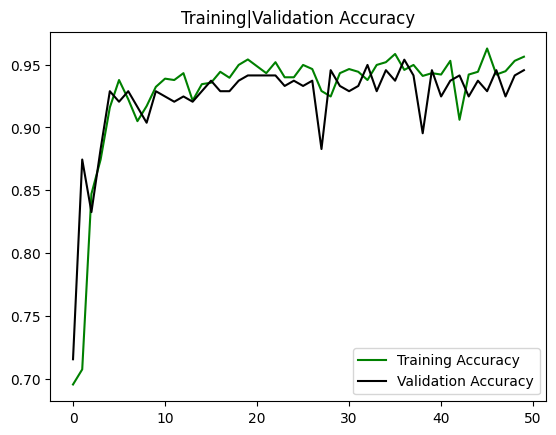

<Figure size 640x480 with 0 Axes>

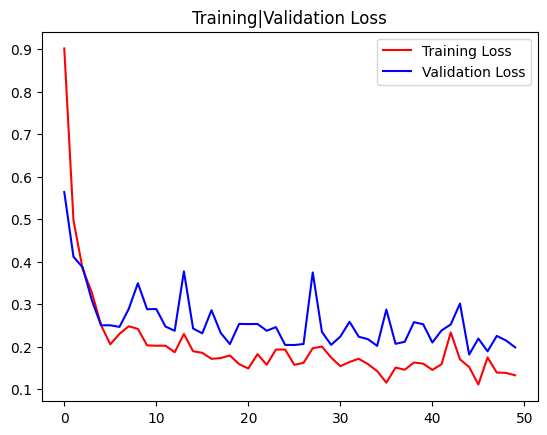

<Figure size 640x480 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(0,50)


plt.plot(epochs, acc, "g", label="Training Accuracy")
plt.plot(epochs, val_acc, "black", label="Validation Accuracy")
plt.title("Training|Validation Accuracy")

plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Training|Validation Loss")

plt.legend(loc=0)
plt.figure()
plt.show()



In [67]:
model.save("models/fire_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
import cv2
import numpy as np
from keras.models import load_model

In [69]:
model = load_model("models/fire_model.h5")
path = "/content/fire_detection/fire_detection/test/test.jpg"
video_path = "/content/fire_detection/fire_detection/test/test.mp4"

1/1 [==============================] - 0s 18ms/step


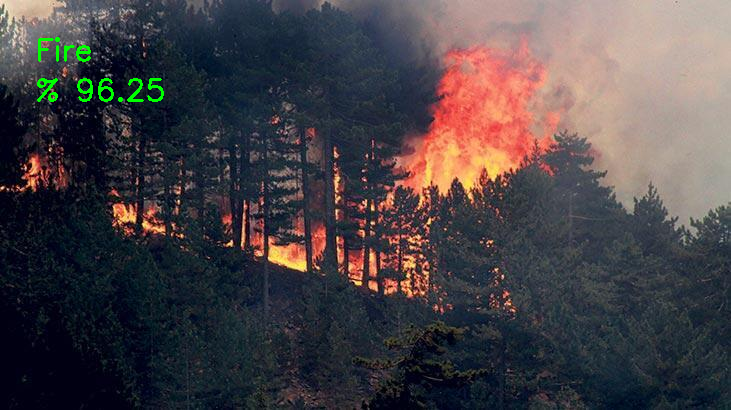

In [72]:
from google.colab.patches import cv2_imshow
test_img = cv2.imread(path)

img = np.asarray(test_img)
img = cv2.resize(img, (224,224))

img = img/255
#print(img.shape)

img = img.reshape(1,224,224,3)
#print(img.shape)

predictions = model.predict(img)
pred = np.argmax(predictions[0])

probability = predictions[0][pred]
probability_ = "% {:.2f}".format(probability*100)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,100), font, 1, color, 2)

cv2_imshow(test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 50ms/step


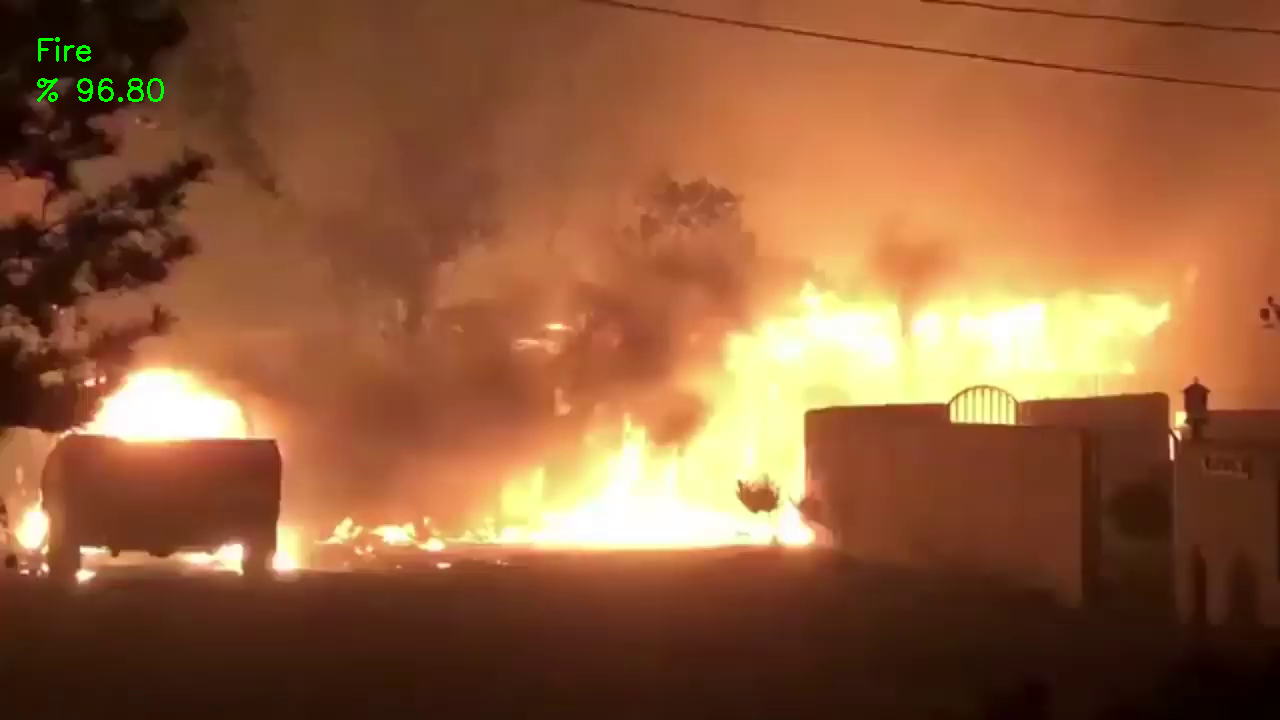

1/1 [==============================] - 0s 49ms/step


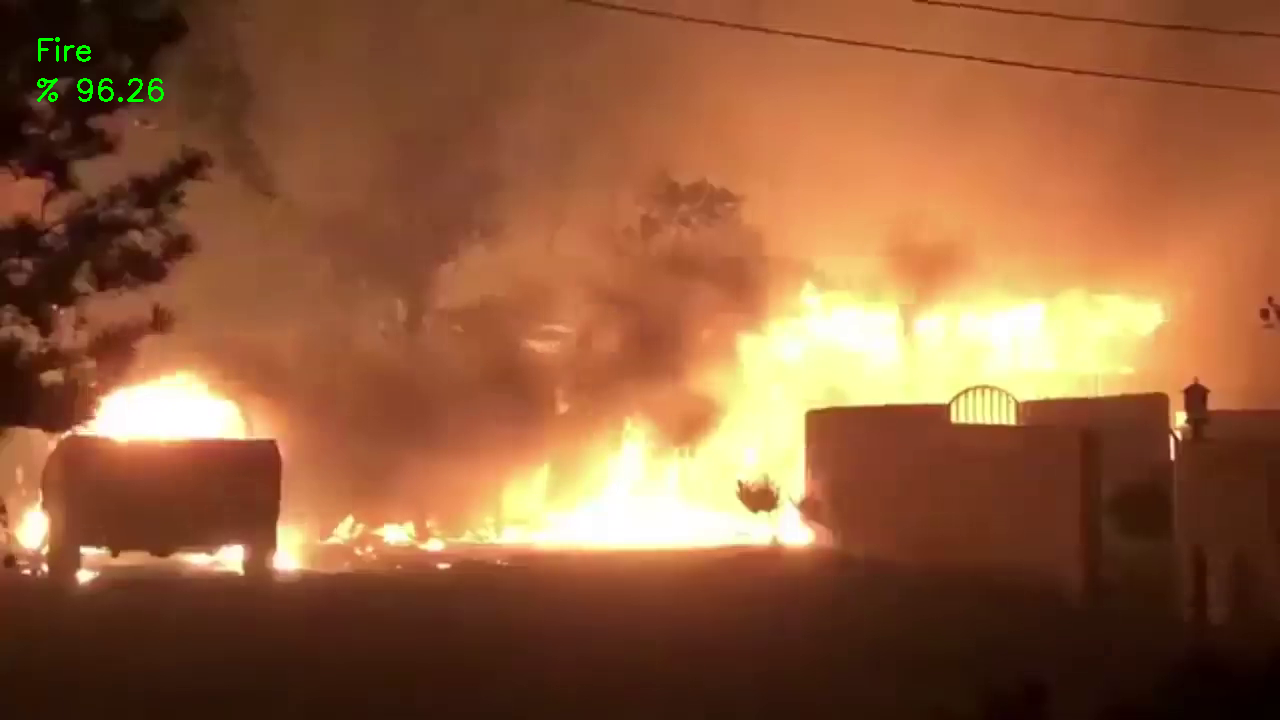

1/1 [==============================] - 0s 29ms/step


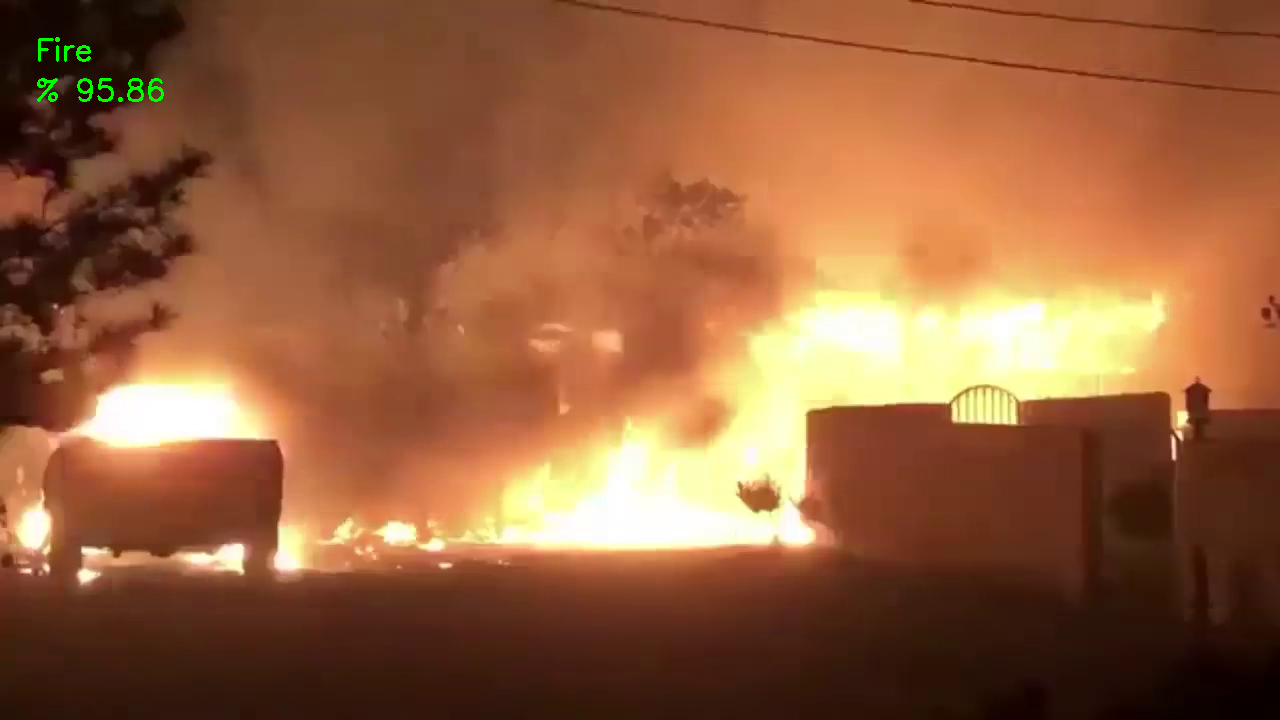

1/1 [==============================] - 0s 38ms/step


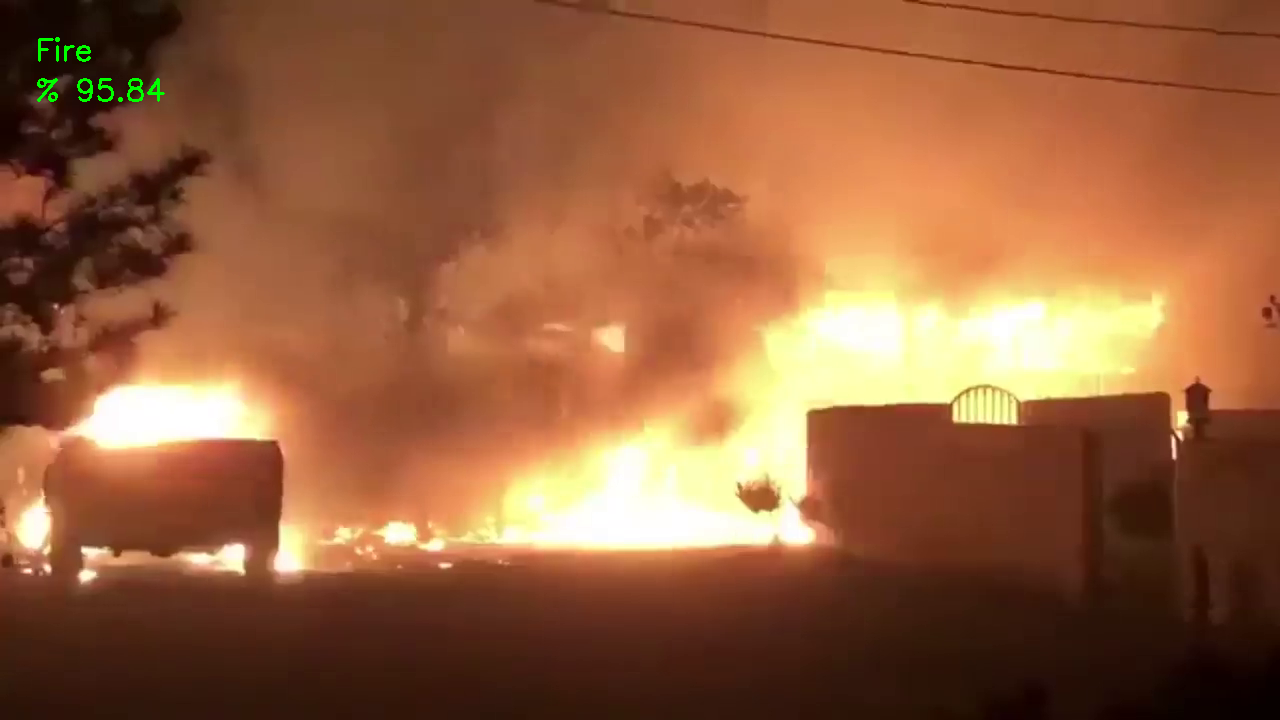

1/1 [==============================] - 0s 25ms/step


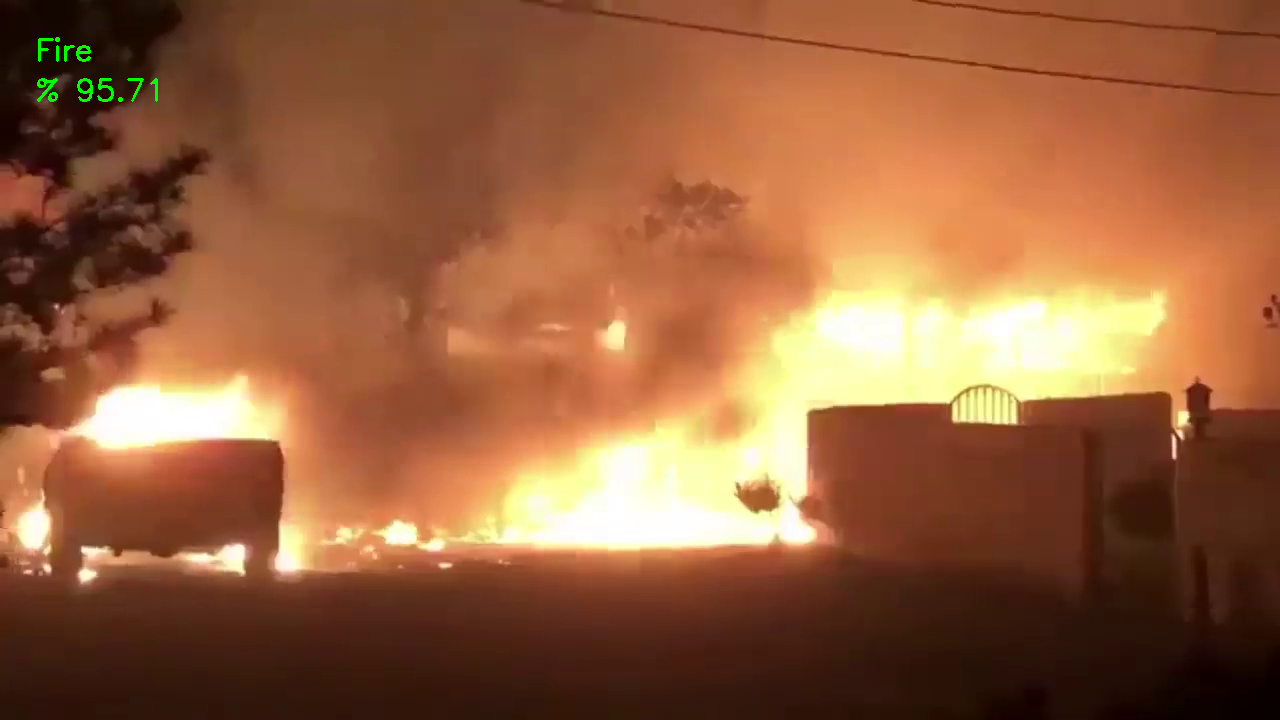

1/1 [==============================] - 0s 35ms/step


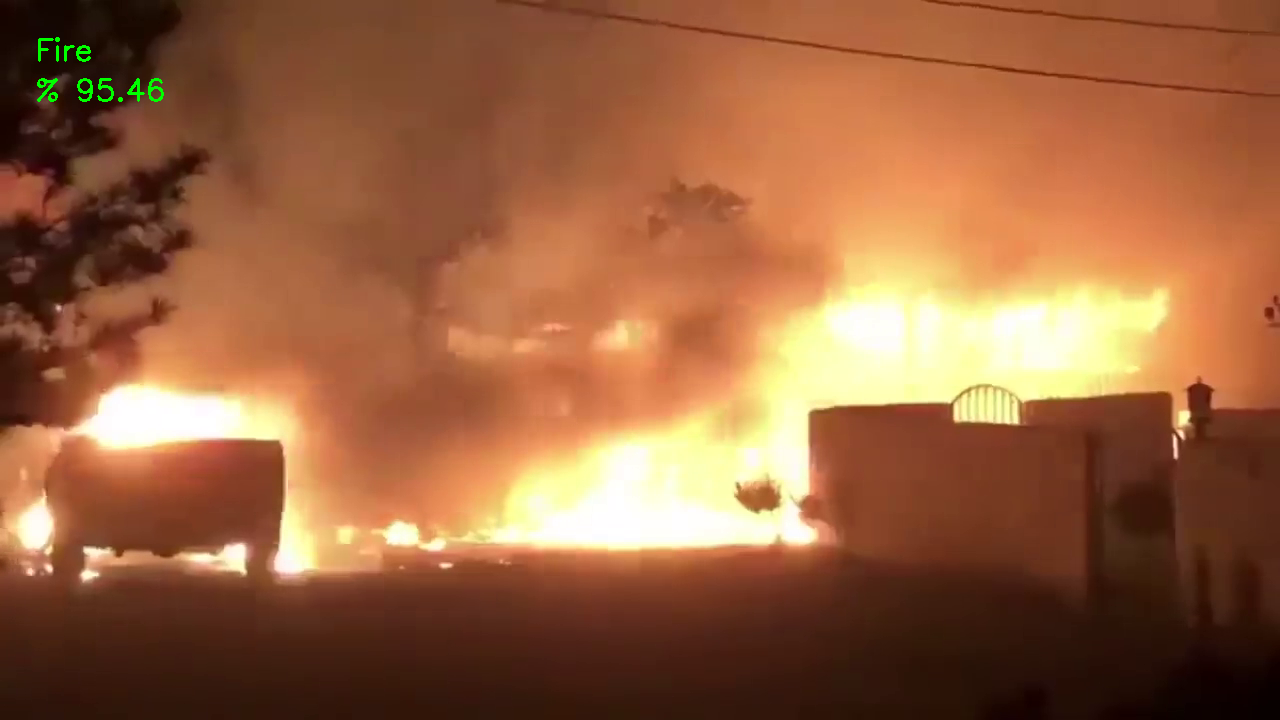

1/1 [==============================] - 0s 27ms/step


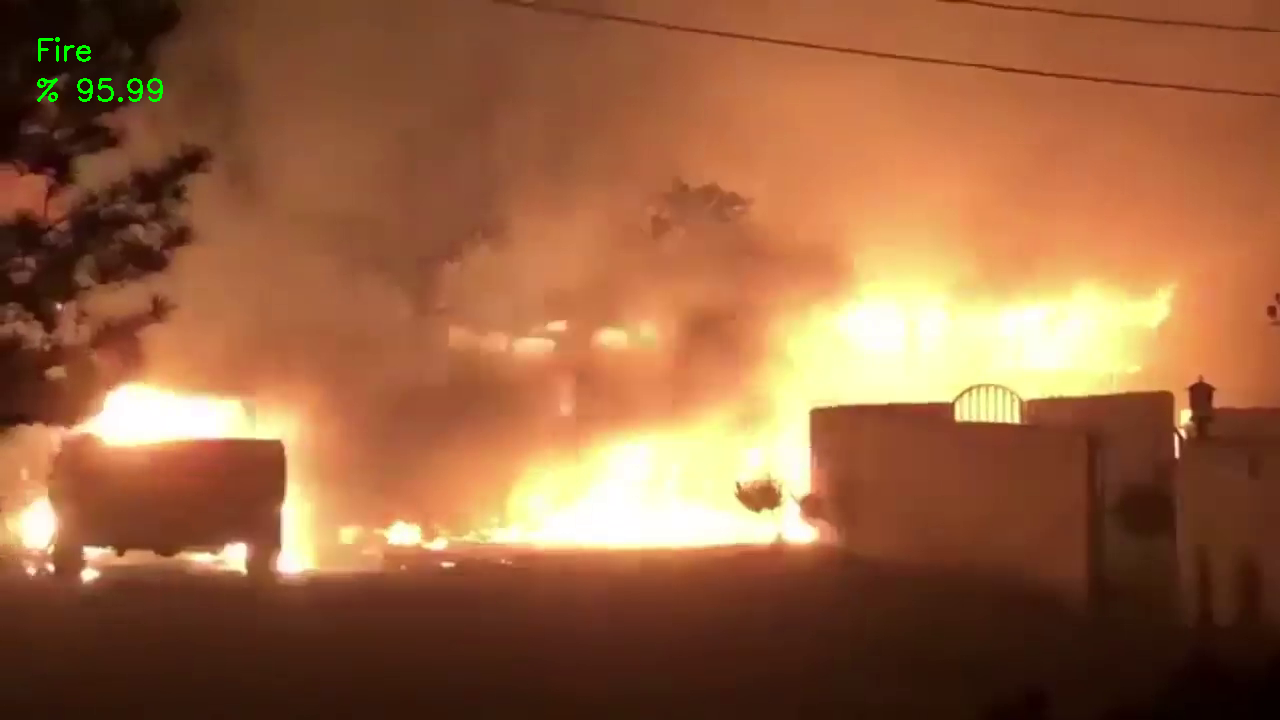

1/1 [==============================] - 0s 58ms/step


In [ ]:
cap = cv2.VideoCapture(video_path)

while True:
    ret,frame = cap.read()

    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255
    #print(img.shape)

    img = img.reshape(1,224,224,3)
    #print(img.shape)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = "% {:.2f}".format(probability*100)

    if pred == 1:
        label = "Fire"
    else:
        label = "Neutral"

    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0,255,0)

    cv2.putText(frame, label, (35,60), font, 1, color, 2)
    cv2.putText(frame, probability_, (35,100), font, 1, color, 2)

    cv2_imshow(frame)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break


cap.release()
cv2.destroyAllWindows()


